# Approximating K PDF using Neural Network


In [1]:
from scipy.special import gamma, kn
from math import pow
import numpy as np

%matplotlib inline

In [2]:
def exact_k_distribution(x,alpha,mu=1.0):
    result = (2.0*pow(alpha, (alpha+1)/2.0)*pow(x, (alpha-1)/2.0))/(pow(mu,(alpha+1)/2.0)*gamma(alpha))
    result = result * kn(alpha-1,2.0*pow((alpha*x)/mu, 0.5))
    return result

In [3]:
# verify from precomputed value

exact_k_distribution(2.0,2.0,1.0)

0.099867991098147466

In [115]:
X_exact = np.arange(1,4,0.01)
Y_exact = np.arange(1,3,0.01)
X_exact,Y_exact = np.meshgrid(X_exact,X_exact)
Z_exact = np.array([exact_k_distribution(x,y) for x,y in zip(np.ravel(X_exact), np.ravel(Y_exact))])
Z_exact = Z_exact.reshape(X_exact.shape)

/home/rhnvrm/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: floating point number truncated to an integer
  This is separate from the ipykernel package so we can avoid doing imports until


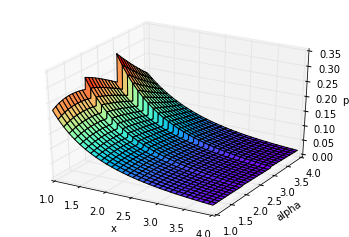

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('alpha')
ax.set_zlabel('pdf')

#Z = get_mesh(exact_k_distribution, X,Y)
ax.plot_surface(X_exact,Y_exact,Z_exact,cmap='rainbow')

In [118]:
from sklearn.utils import shuffle

Xvals = np.arange(1,4,0.01)
Alpha = np.arange(1,3,0.01)

X = np.array([[x0, y0] for x0 in Xvals for y0 in Alpha])
Y = np.array([exact_k_distribution(x[0],x[1]) for x in X])
X,Y = shuffle(X,Y)



/home/rhnvrm/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: floating point number truncated to an integer
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [120]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [121]:
from sklearn.metrics import r2_score, accuracy_score

r2_score(y_test, mlp.predict(X_test))

0.99795830542966601

In [122]:
X_mlp = np.arange(1,4,0.01)
Y_mlp = np.arange(1,3,0.01)
X_mlp,Y_mlp = np.meshgrid(X_mlp,X_mlp)
Z_mlp = np.array([mlp.predict(np.array([x, y]).reshape(1,-1)) for x,y in zip(np.ravel(X_mlp), np.ravel(Y_mlp))])
Z_mlp = Z_mlp.reshape(X_mlp.shape)

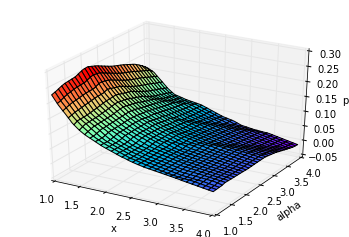

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('alpha')
ax.set_zlabel('pdf')

#Z = get_mesh(exact_k_distribution, X,Y)
ax.plot_surface(X_mlp,Y_mlp,Z_mlp,cmap='rainbow')

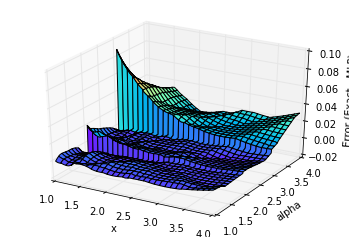

In [124]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('alpha')
ax.set_zlabel('Error (Exact - MLP)')

ax.plot_surface(X_mlp,Y_mlp,Z_exact - Z_mlp,cmap='rainbow')